In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
import re

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
import re

a = []
w = []
for i in data['Ticket']:
    pattern = re.compile('[a-zA-Z]+')
    matches = pattern.findall(i)
    a.append(matches)
    if any(isinstance(x, str) for x in matches):
        w.append(''.join(matches))
    else:
        w.append('0')


In [6]:
data['Ticket_variety'] = w

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_variety
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STONO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,WC
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [8]:
data['Family'] = data['SibSp'] + data['Parch'] + 1

In [9]:
data.drop(['SibSp','Parch'], axis = 1, inplace=True)

In [10]:
data['Cabin'].fillna(0, inplace=True)

In [11]:
q = []
s = []
for i in data['Ticket']:
    pattern = re.compile('\d+')
    matches = pattern.findall(i)
    if matches:
        num_str = ''.join(matches)
        q.append(num_str)
    else:
        q.append('0')



In [12]:
data['Ticket1'] = q

In [13]:
a = []
for i in data['Cabin']:
    a.append(str(i)[0])

In [14]:
data['Deck'] = a

In [15]:
data1 = data.drop(['Ticket','PassengerId'], axis =1)

In [16]:
data1['individual_fare'] = data['Fare'] / data['Family']

In [17]:
data1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000


In [18]:
data1['person'] = data1['Name'].str.split().str.get(1)

In [19]:
data1['Surname'] = data1['Name'].str.split().str.get(0)

In [20]:
data1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500,Mr.,"Braund,"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165,Mrs.,"Cumings,"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500,Miss.,"Heikkinen,"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000,Mrs.,"Futrelle,"
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000,Mr.,"Allen,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000,Rev.,"Montvila,"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000,Miss.,"Graham,"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250,Miss.,"Johnston,"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000,Mr.,"Behr,"


In [21]:
data1[(data1['Embarked'] == 'S') & (data1['Deck'] =='A') & (data1['Family'] == 3)]

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname
445,1,1,"Dodge, Master. Washington",male,4.0,81.8583,A34,S,0,3,33638,A,27.2861,Master.,"Dodge,"


<AxesSubplot:ylabel='Frequency'>

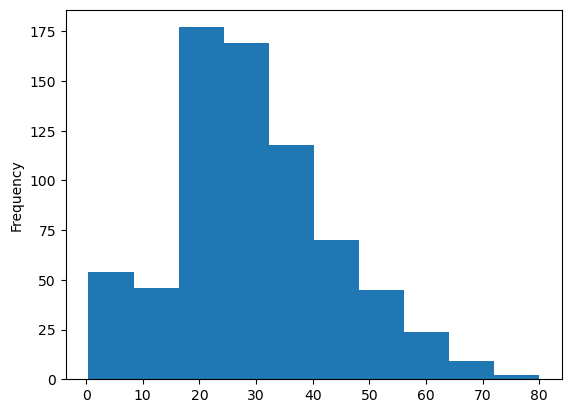

In [22]:
data1['Age'].plot(kind='hist')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

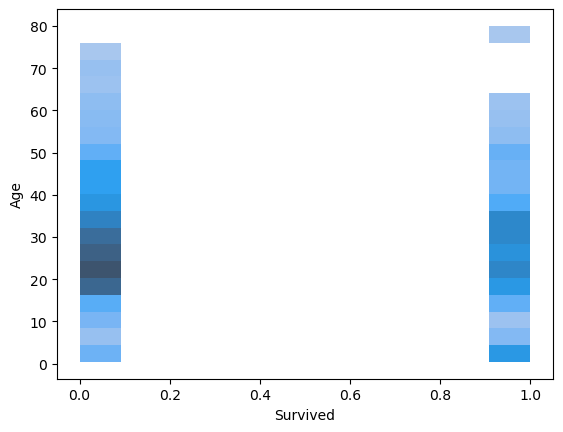

In [23]:

sns.histplot(data = data1, x='Survived', y='Age')

In [24]:
data1['person'] = data1['person'].str.replace('Mrs','Miss')
data1['person'] = data1['person'].str.replace('Ms','Miss')
data1['person'] = data1['person'].str.replace('Mme','Miss')


In [25]:
data1['person'].value_counts()

Mr.             502
Miss.           302
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Mlle.             2
Col.              2
Major.            2
Gordon,           2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Carlo,            1
Messemaeker,      1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: person, dtype: int64

In [84]:
name =['Mr.','Miss.','Master.']
for i in data1['person']:
    if i not in name:
        data1['person'] = data1['person'].str.replace(i, 'other')
        
        

In [85]:
data1['person'].value_counts()

Mr.        502
Miss.      302
other       47
Master.     40
Name: person, dtype: int64

In [86]:
data1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500,Mr.,"Braund,",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165,Miss.,"Cumings,",0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500,Miss.,"Heikkinen,",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000,Miss.,"Futrelle,",0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000,Mr.,"Allen,",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000,other,"Montvila,",1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000,Miss.,"Graham,",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250,Miss.,"Johnston,",0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000,Mr.,"Behr,",1


In [87]:
pd.crosstab(data1['Pclass'], data1['Deck'])

Deck,0,A,B,C,D,E,F,G,T
Pclass,,,,,,,,,
1,40,15,47,59,29,25,0,0,1
2,168,0,0,0,4,4,8,0,0
3,479,0,0,0,0,3,5,4,0


In [88]:
pd.crosstab(data1['Pclass'], data1['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [89]:
pd.crosstab(data1['person'], data1['Survived'])

Survived,0,1
person,,
Master.,17,23
Miss.,77,225
Mr.,423,79
other,32,15


In [90]:
data1.drop(['Alone'], axis=1)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500,Mr.,"Braund,"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165,Miss.,"Cumings,"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500,Miss.,"Heikkinen,"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000,Miss.,"Futrelle,"
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000,Mr.,"Allen,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000,other,"Montvila,"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000,Miss.,"Graham,"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250,Miss.,"Johnston,"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000,Mr.,"Behr,"


In [91]:
s =[]
for i in data1['Family']:
    if i == 1:
        s.append(1)
    else:
        s.append(0)
    

In [92]:
data1['Alone'] = s

In [93]:
data1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500,Mr.,"Braund,",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165,Miss.,"Cumings,",0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500,Miss.,"Heikkinen,",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000,Miss.,"Futrelle,",0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000,Mr.,"Allen,",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000,other,"Montvila,",1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000,Miss.,"Graham,",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250,Miss.,"Johnston,",0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000,Mr.,"Behr,",1


In [94]:
data1[data1['Deck'] == '0']

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.625000,Mr.,"Braund,",0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.925000,Miss.,"Heikkinen,",1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.050000,Mr.,"Allen,",1
5,0,3,"Moran, Mr. James",male,NaN,8.4583,0,Q,0,1,330877,0,8.458300,Mr.,"Moran,",1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,0,S,0,5,349909,0,4.215000,Master.,"Palsson,",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,7.0500,0,S,SOTONOQ,1,392076,0,7.050000,Mr.,"Sutehall,",1
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,Q,0,6,382652,0,4.854167,Miss.,"Rice,",0
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.000000,other,"Montvila,",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.862500,Miss.,"Johnston,",0


# Data visualization

<AxesSubplot:xlabel='Alone', ylabel='count'>

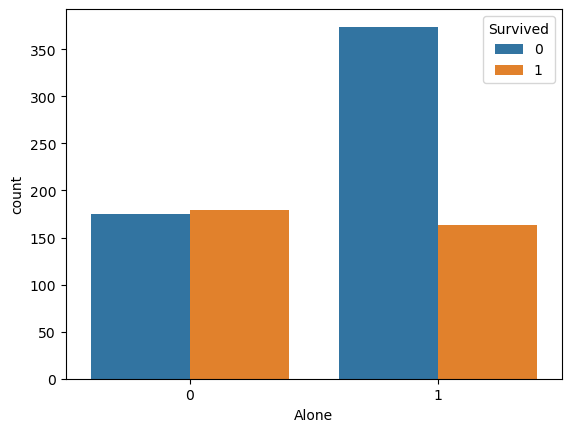

In [95]:
sns.countplot(data=data1, x ='Alone', hue ='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

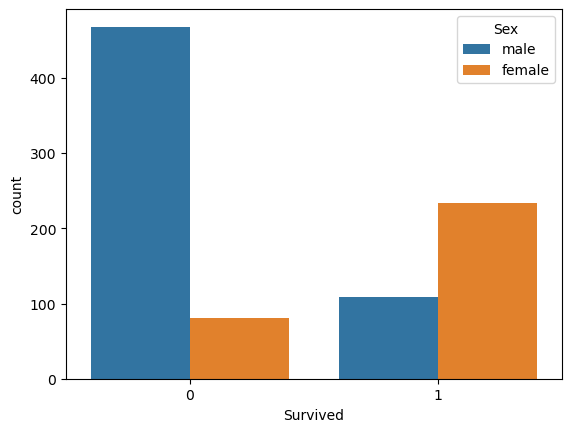

In [96]:
sns.countplot(data=data1, x ='Survived', hue ='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

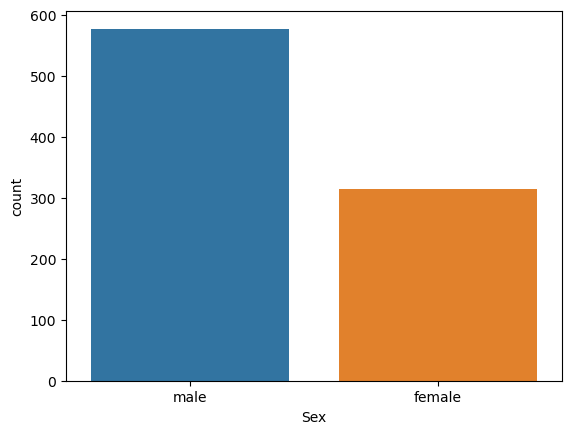

In [97]:
sns.countplot(data=data1, x ='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

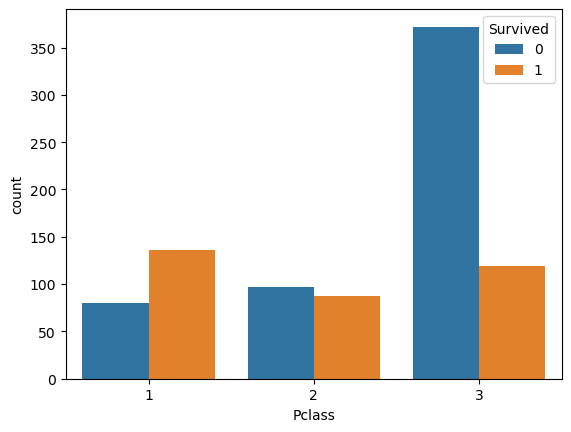

In [98]:
sns.countplot(data=data1, x ='Pclass', hue = 'Survived')

In [ ]:
data1['Age']

# survival on basis of Loading

<AxesSubplot:xlabel='Embarked', ylabel='count'>

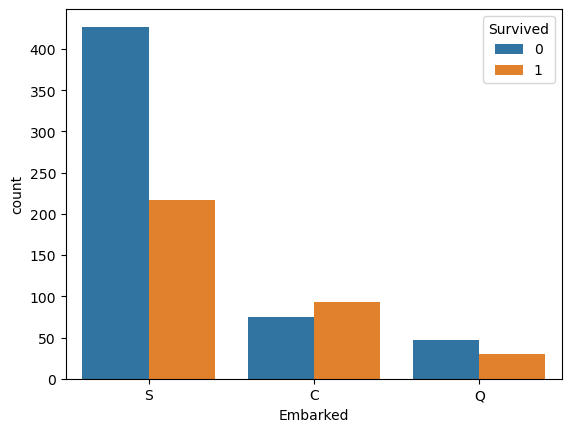

In [99]:
sns.countplot(data=data1, x ='Embarked', hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

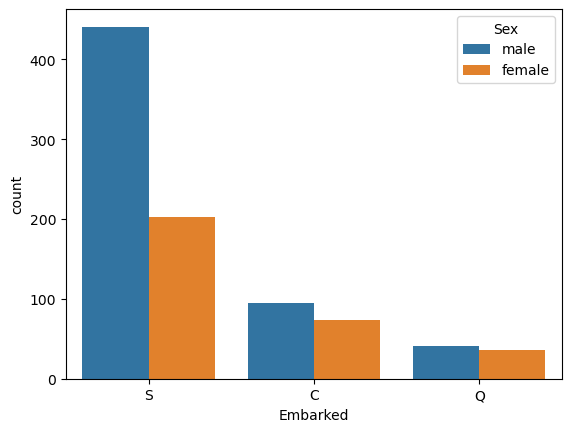

In [100]:
sns.countplot(data=data1, x ='Embarked', hue = 'Sex')

# death of MR Miss Mr and others

<AxesSubplot:xlabel='Survived', ylabel='count'>

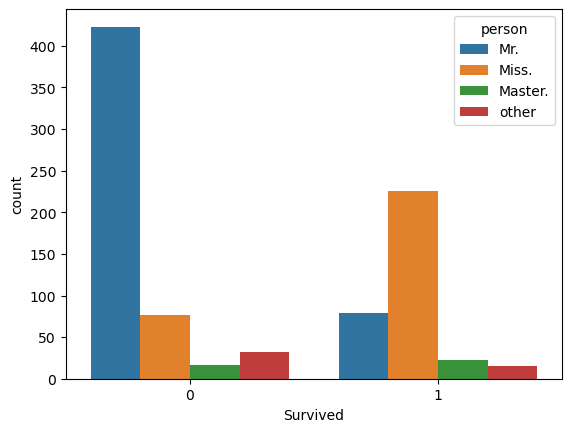

In [101]:
sns.countplot(data=data1, x ='Survived', hue = 'person')

# count of mr miss and other classwise

<AxesSubplot:xlabel='Pclass', ylabel='count'>

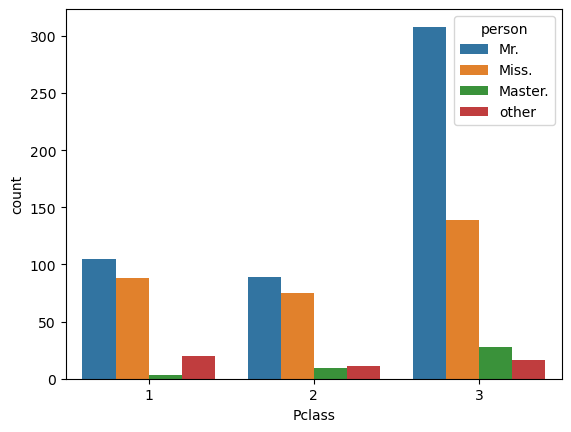

In [103]:
sns.countplot(data = data1, x ='Pclass', hue='person')

In [107]:
a = data1['person'].value_counts()
b = data1['Pclass'].value_counts()

<AxesSubplot:>

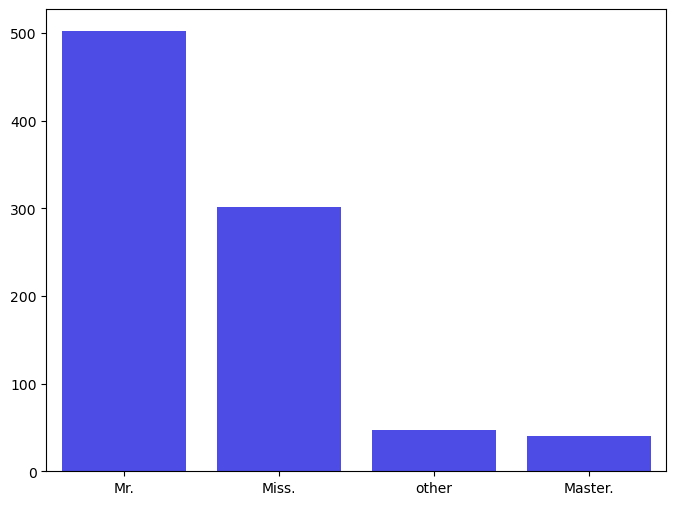

In [116]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x=a.index, y=a.values, ax=ax, color='blue', alpha=0.8 )


In [117]:
data1

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Ticket_variety,Family,Ticket1,Deck,individual_fare,person,Surname,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,A,2,521171,0,3.62500,Mr.,"Braund,",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,PC,2,17599,C,35.64165,Miss.,"Cumings,",0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,STONO,1,23101282,0,7.92500,Miss.,"Heikkinen,",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,0,2,113803,C,26.55000,Miss.,"Futrelle,",0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0,1,373450,0,8.05000,Mr.,"Allen,",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,S,0,1,211536,0,13.00000,other,"Montvila,",1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,112053,B,30.00000,Miss.,"Graham,",1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,0,S,WC,4,6607,0,5.86250,Miss.,"Johnston,",0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,111369,C,30.00000,Mr.,"Behr,",1


In [143]:
data2 = data1.drop(['Name','Cabin','Deck','Surname','Fare','Ticket1'], axis =1 )

# missing values

In [144]:
data2

,Survived,Pclass,Sex,Age,Embarked,Ticket_variety,Family,individual_fare,person,Alone
0,0,3,male,22.0,S,A,2,3.62500,Mr.,0
1,1,1,female,38.0,C,PC,2,35.64165,Miss.,0
2,1,3,female,26.0,S,STONO,1,7.92500,Miss.,1
3,1,1,female,35.0,S,0,2,26.55000,Miss.,0
4,0,3,male,35.0,S,0,1,8.05000,Mr.,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,0,1,13.00000,other,1
887,1,1,female,19.0,S,0,1,30.00000,Miss.,1
888,0,3,female,NaN,S,WC,4,5.86250,Miss.,0
889,1,1,male,26.0,C,0,1,30.00000,Mr.,1


In [303]:
data2['Embarked'] = data2['Embarked'].fillna('S')

In [304]:
data2['Embarked'].isnull().sum()

0

In [213]:
data2['person'].unique()

array(['Mr.', 'Miss.', 'Master.', 'other'], dtype=object)

In [305]:
a = data2[data2['person'] =='Miss.']
b = data2[data2['person'] =='Mr.']
c = data2[data2['person'] =='Master.']
d = data2[data2['person'] =='other']

In [306]:
a['Age'] = a['Age'].fillna(27.86)
b['Age'] = b['Age'].fillna(32.38)
c['Age'] = c['Age'].fillna(4.57)
d['Age'] = d['Age'].fillna(37.07)

C:\Users\ravin\AppData\Local\Temp\ipykernel_10712\1908861023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Age'] = a['Age'].fillna(27.86)
C:\Users\ravin\AppData\Local\Temp\ipykernel_10712\1908861023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Age'] = b['Age'].fillna(32.38)
C:\Users\ravin\AppData\Local\Temp\ipykernel_10712\1908861023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [307]:
data3 = pd.concat([a,b,c,d], axis=0, ignore_index=True)

In [308]:
data3.mean()

C:\Users\ravin\AppData\Local\Temp\ipykernel_10712\3989530915.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data3.mean()


Survived            0.383838
Pclass              2.308642
Age                29.853760
Family              1.904602
individual_fare    19.916375
Alone               0.602694
dtype: float64

In [309]:
from sklearn.preprocessing import OneHotEncoder


In [310]:
cate = [i for i in data3.columns if data3[i].dtype =='object']

In [311]:
num = [i for i in data3.columns if data3[i].dtype !='object']
numerical = data3[num]
numerical

,Survived,Pclass,Age,Family,individual_fare,Alone
0,1,1,38.00,2,35.64165,0
1,1,3,26.00,1,7.92500,1
2,1,1,35.00,2,26.55000,0
3,1,3,27.00,3,3.71110,0
4,1,2,14.00,2,15.03540,0
...,...,...,...,...,...,...
886,0,2,28.00,2,16.50000,0
887,1,2,27.00,2,6.92915,0
888,0,3,37.07,1,9.50000,1
889,0,3,47.00,1,9.00000,1


In [312]:
categorical = data3[cate]
categorical

,Sex,Embarked,Ticket_variety,person
0,female,C,PC,Miss.
1,female,S,STONO,Miss.
2,female,S,0,Miss.
3,female,S,0,Miss.
4,female,C,0,Miss.
...,...,...,...,...
886,male,S,0,other
887,female,C,SCPARIS,other
888,male,S,0,other
889,male,S,0,other


# encoding through ONEHOTENCODER

In [343]:
categorical['Embarked'] = categorical['Embarked'].fillna('S')

C:\Users\ravin\AppData\Local\Temp\ipykernel_10712\3488231545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Embarked'] = categorical['Embarked'].fillna('S')


In [372]:
ohe = OneHotEncoder(drop='first')
transformed = ohe.fit_transform(categorical).toarray()
transformed1 = pd.DataFrame(transformed)

In [373]:
transformed1

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [374]:
x= numerical.drop(['Survived'], axis=1)
y=numerical['Survived']

In [375]:
X = pd.merge(x, transformed1, left_index = True, right_index = True)


In [420]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled1 = pd.DataFrame(x_scaled)


C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [407]:
from sklearn.model_selection import train_test_split

In [408]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled1, y, test_size = 0.20, random_state=42, stratify=y)

# Logistic Regression model

In [409]:
from sklearn.linear_model import LogisticRegression       

In [410]:
lr = LogisticRegression()      

In [411]:
lr.fit(x_train, y_train)

LogisticRegression()

In [412]:
y_pre_ytrain = lr.predict(x_train)

In [413]:

from sklearn.metrics import confusion_matrix, accuracy_score

In [414]:
score  = confusion_matrix(y_pre_ytrain, y_train)
score

array([[394,  71],
       [ 45, 202]], dtype=int64)

In [415]:
score  = accuracy_score(y_pre_ytrain, y_train)*100
score

83.70786516853933

In [416]:
result = y_pre_ytrain - y_train
result.value_counts()

 0    596
-1     71
 1     45
Name: Survived, dtype: int64

In [417]:
y_pre_ytest = lr.predict(x_test)

In [418]:
score  = accuracy_score(y_pre_ytest, y_test)*100
score

84.91620111731844

# Random Forest Classifier model

In [423]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
rfc = RandomForestClassifier()

In [425]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [426]:
y_pred = rfc.predict(x_train)

In [427]:
score  = accuracy_score(y_pred, y_train)*100
score

98.87640449438202

# y_train Error

In [429]:
result = y_pred - y_train
result.value_counts()

 0    704
-1      5
 1      3
Name: Survived, dtype: int64

In [430]:
y_pred_test = rfc.predict(x_test)

In [431]:
score  = accuracy_score(y_pred_test, y_test)*100
score

80.44692737430168

#  y_test error

In [434]:
result = y_pred_test - y_test
result.value_counts()

 0    144
-1     20
 1     15
Name: Survived, dtype: int64

#  SVC model


In [437]:
from sklearn.svm import SVC

In [438]:
svc = SVC()

In [439]:
svc.fit(x_train, y_train)

SVC()

In [440]:
y_p_train = svc.predict(x_train)

In [441]:
score  = accuracy_score(y_p_train, y_train)*100
score

83.56741573033707

In [445]:
error = y_p_train - y_train
error.value_counts()

 0    595
-1     75
 1     42
Name: Survived, dtype: int64

In [442]:
y_p_test = svc.predict(x_test)

In [443]:
score  = accuracy_score(y_p_test, y_test)*100
score

82.12290502793296